In [124]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [125]:
df = pd.read_csv('student-lpor.csv')    # Загрузим наши данные 
df.head()                               # Посмотрим как выглядят наши данные, путем выгрузки первых пяти строк дата сета

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13


In [126]:
df.info()                               # Посмотрим на пропуски в данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  schoolsup   649 non-null    object
 15  famsup      649 non-null    object
 16  paid        649 non-null    object
 17  activities  649 non-null    object
 18  nursery     649 non-null    object
 19  higher      649 non-null    object
 20  internet  

Данные состоят из 648 строк и 320 столбцов. Пропусков в данных нет.

In [127]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
dtype: object

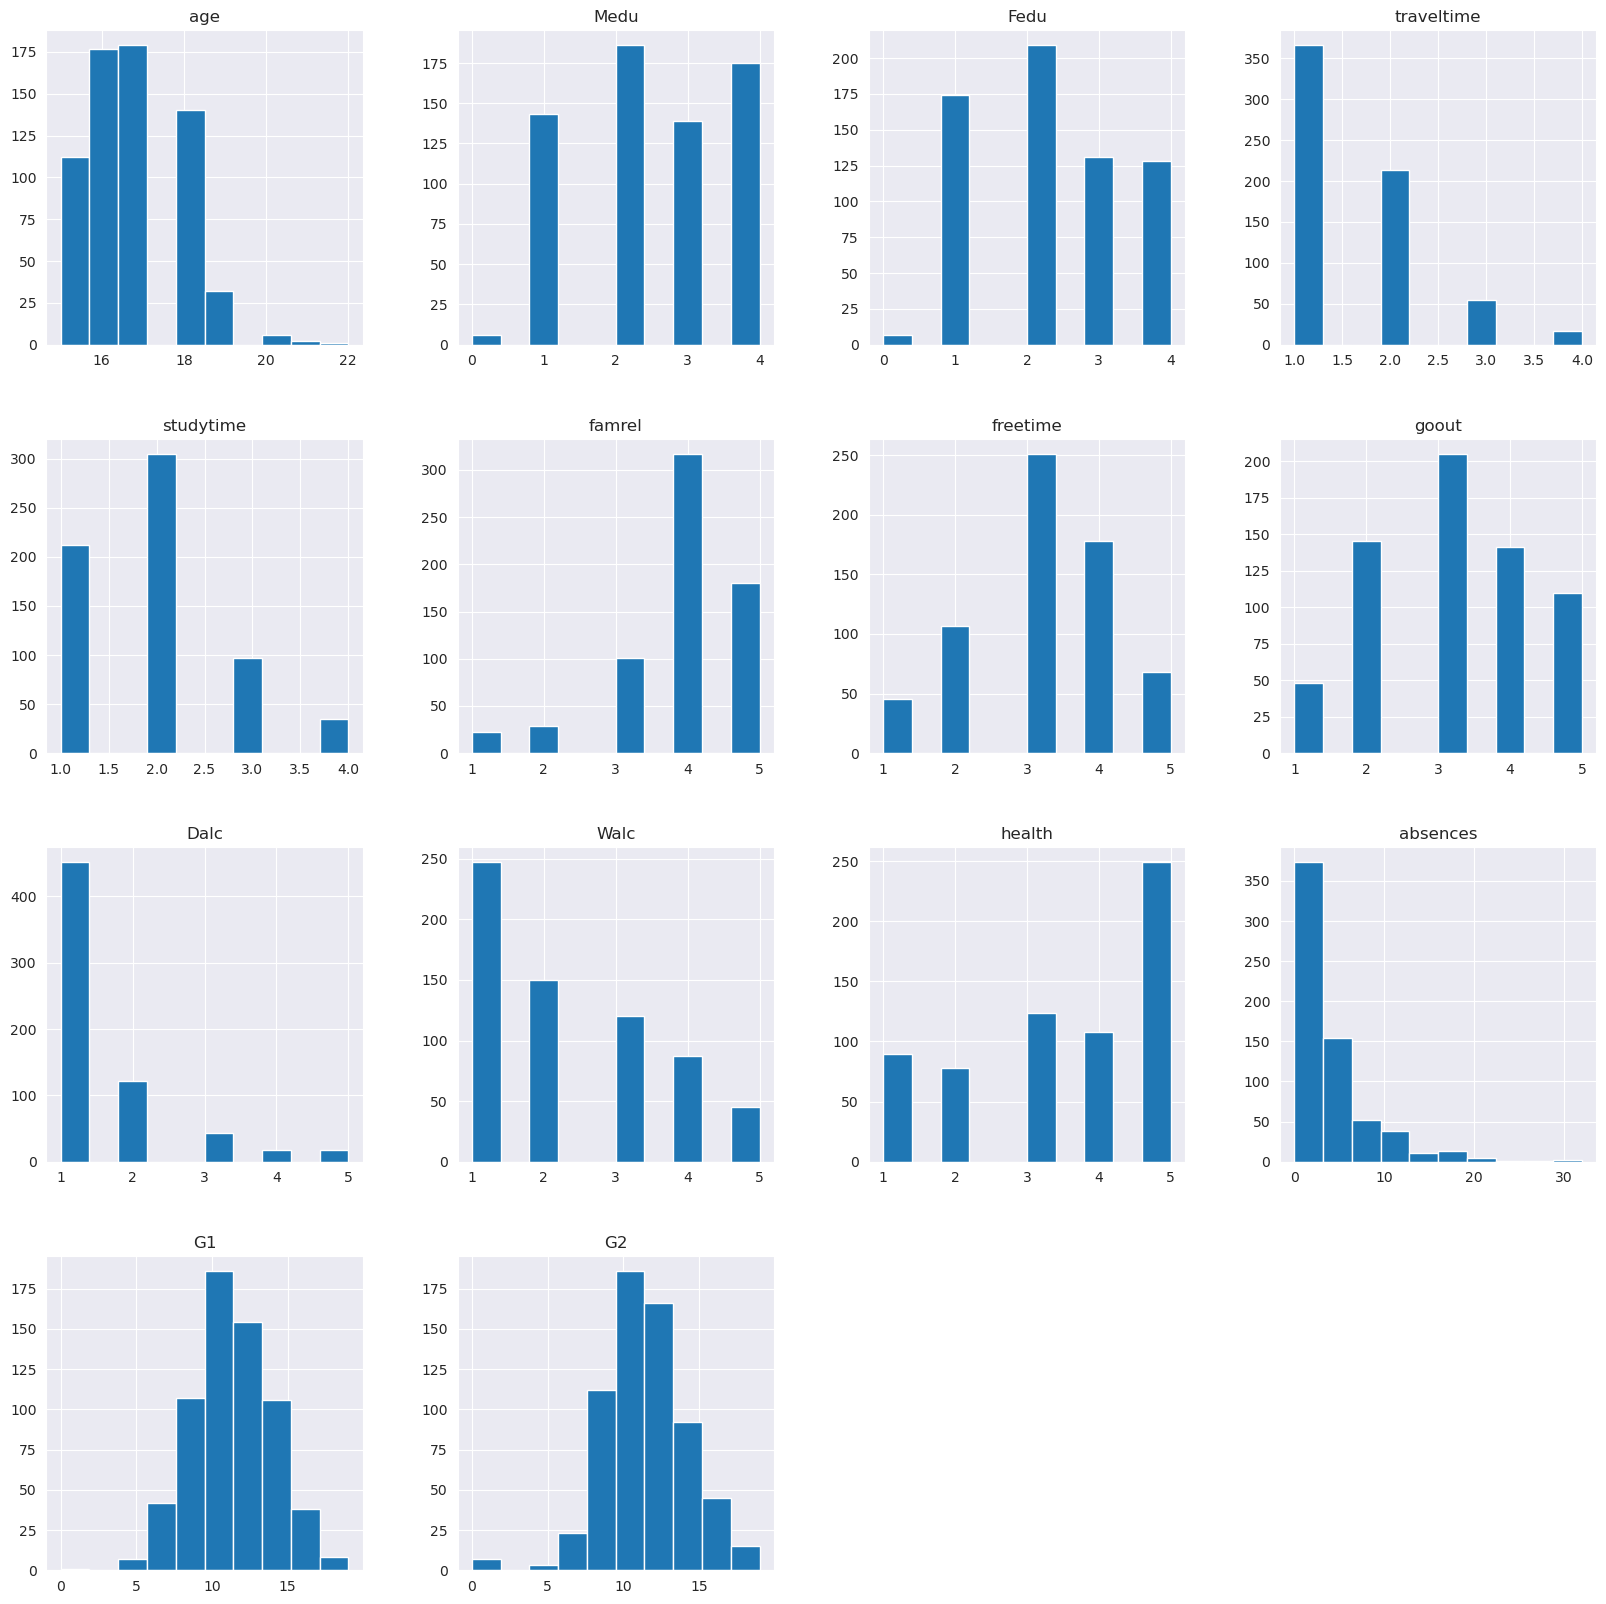

In [128]:
df.hist(figsize=(20,20));

In [129]:
df_numbers = df.select_dtypes(include='int64')

<Axes: >

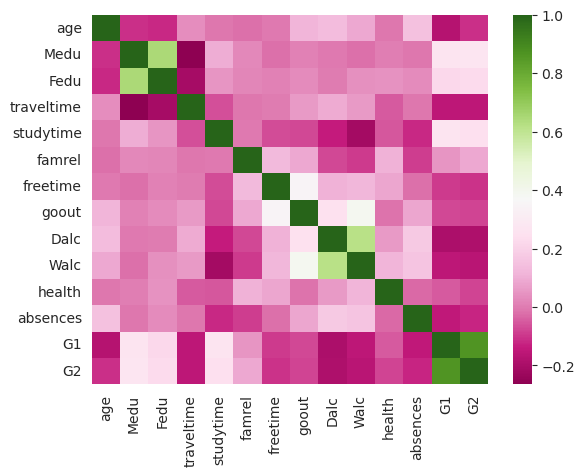

In [130]:
corr = df_numbers.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='PiYG')

In [131]:
df_numbers.describe() # посмотрим средние показатели данных

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000


In [132]:
# По графику hotmap видим, что есть зависимости уровеня образования матери и уровня образования отца. Так -же есть зависимость в данных кол-во употребления алкоголя в рабочий день и кол-во употребления алкоголя в выходные дни.
# На основании этих зависимостей разделим данные на две части по уровню образования родителей и посмотрим как изменятся средние показатели употребления алкоголя и средняя оценка за семестр.

a = df_numbers[(df.Medu>=3) & (df.Fedu>=3)]  # родители у которых есть среднее образование и выше
b = df_numbers[(df.Medu<3) & (df.Fedu<3)]    # родители у которых образования не выше среднего

In [133]:
a.shape

(216, 14)

In [134]:
b.shape

(292, 14)

In [135]:
a.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,16.564815,3.643519,3.546296,1.370370,1.990741,3.972222,3.171296,3.268519,1.523148,2.379630,3.601852,3.800926,12.129630,12.393519
std,1.195131,0.480072,0.499008,0.633816,0.806893,0.934689,1.022223,1.182087,0.924811,1.330973,1.462332,4.862978,2.673183,2.437642
min,15.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000
25%,16.000000,3.000000,3.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,11.000000
50%,16.000000,4.000000,4.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000
max,21.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,18.000000,18.000000


In [136]:

b.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,16.839041,1.503425,1.458904,1.770548,1.880137,3.910959,3.195205,3.195205,1.486301,2.253425,3.554795,3.592466,10.770548,10.842466
std,1.214793,0.540448,0.538889,0.840608,0.826546,0.976854,1.048437,1.221054,0.936002,1.291323,1.407055,4.527314,2.481289,2.793435
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000
25%,16.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000
50%,17.000000,2.000000,1.000000,2.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000
75%,18.000000,2.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,12.250000,13.000000
max,21.000000,2.000000,2.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,26.000000,19.000000,18.000000


<Axes: xlabel='Dalc', ylabel='Count'>

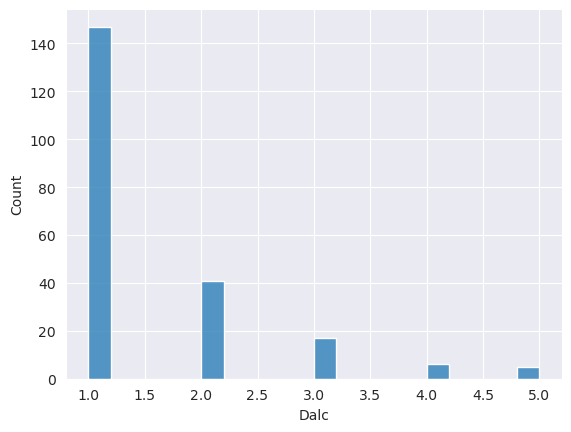

In [137]:
sns.histplot(data = a.Dalc, bins = 20)   #посмтрим на распределение употребления уровня алкоголя в будни у детей чьи родители имеют образование и выше более подробно

<Axes: xlabel='Walc', ylabel='Count'>

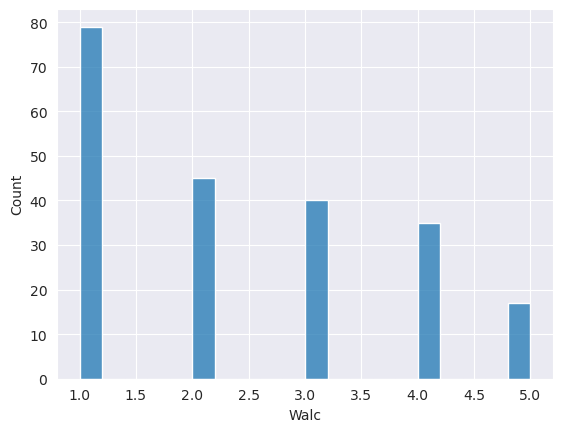

In [138]:
sns.histplot(data = a.Walc, bins = 20) 

    На столбчатых диаграммах можно наблюдать следующие тенденции в данных :
    1) уменьшение кол-во школьниов почти не пьющих в будние дни почти вдва раза относительно выходных дней
    2) незначительное увеличение кол-ва школьниво умеренно употребляющих алкоголь в будние дни
    3) более чем двухкратный прирост в выходные дни школьников "средне" употребляющих алкоголь
    4) трехкратный прирост школьников употребляющих алкоголь на уровне "4" единиц относительно будних дней
    5) двух кртаный прирост школьников очень сильно употребляющих алкоголь в выходные дни

<Axes: xlabel='Dalc', ylabel='Count'>

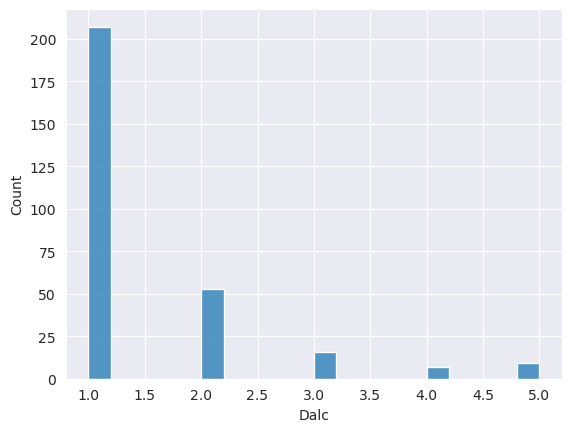

In [139]:
sns.histplot(data = b.Dalc, bins = 20) # посмотрим на такое же распределение, но уже с данными школьников чьи родители имеют образование ниже среднего.

<Axes: xlabel='Walc', ylabel='Count'>

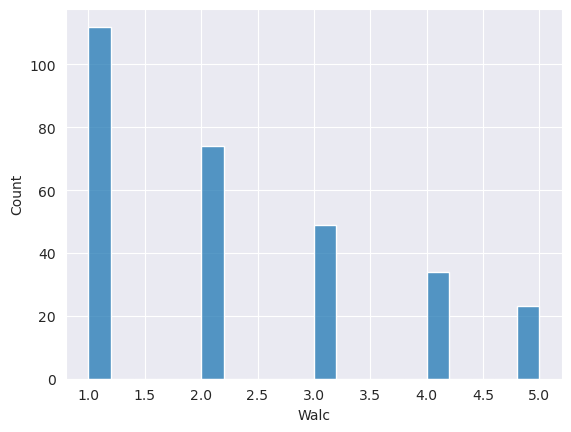

In [140]:
sns.histplot(data = b.Walc, bins = 20)

Основные тенденции изменения сохраняются как и на предыдущих диаграммах. Двухкратное уменьешние школьников не употребляющих алкоголь и почти двухкратные увеличения кол-ва по чатырем показателям.

<Axes: xlabel='Dalc', ylabel='age'>

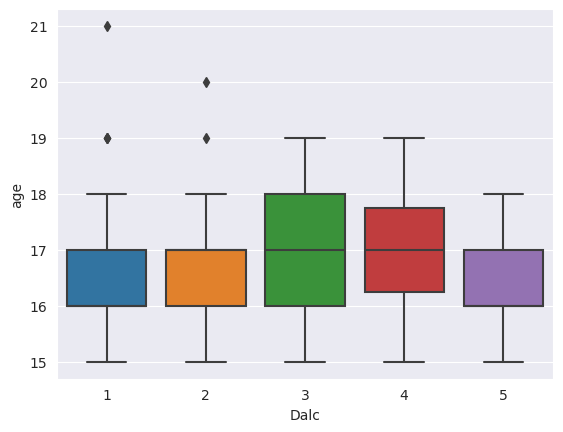

In [141]:
sns.boxplot(data = a, x = 'Dalc', y = 'age')     

<Axes: xlabel='Walc', ylabel='age'>

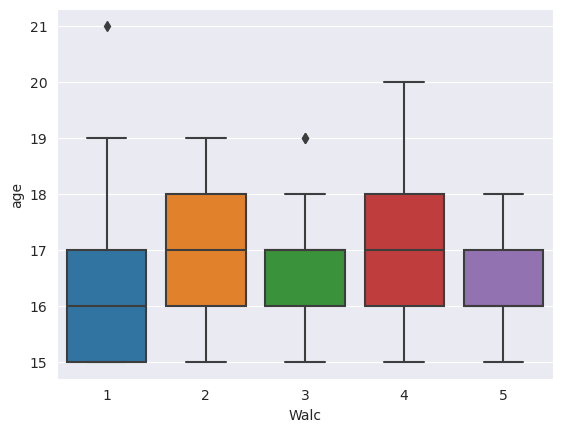

In [142]:
sns.boxplot(data = a, x = 'Walc', y = 'age') 

    На графиках выше видно, что в семьях где родители имеют образование выше среднего можно сделать вывод,что основной возраст школьников употребляющих алкоголь в будни и выходные дни от 16 до 17. 
В буднии дни средний среднее кол-во алкоголя употребляют школьники возратсом от 16 до 18 лет, тем неменее в выходные дни эта возрастная группа от 16 до 17 лет. В выходные дни можно наблюдать увеличение boxplot графиков над точками 2 и 4. Выброс макисмального возраста 21 года остается неизменным над точкой минимального употребления алкоголя.

<Axes: xlabel='Dalc', ylabel='age'>

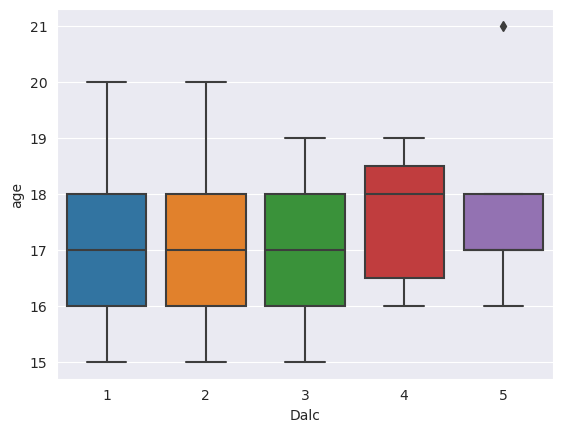

In [143]:
sns.boxplot(data = b, x = 'Dalc', y='age') 

<Axes: xlabel='Walc', ylabel='age'>

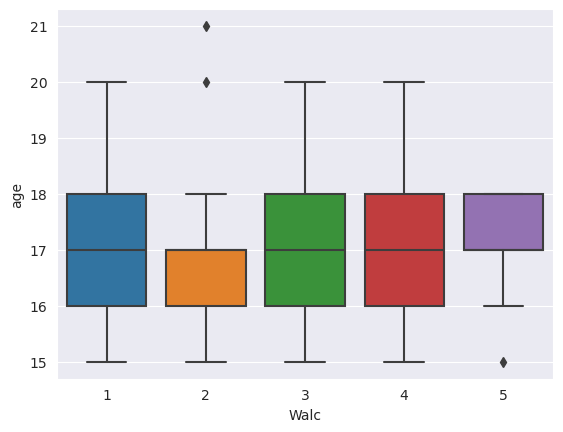

In [144]:
sns.boxplot(data = b, x = 'Walc',y='age')

Видим изменение возраста школьников употребляющих алкоголь на отметке "2" в сторону уменьшения промежутка возрастной группы с 16 до 18 лет в будние дни и с 16 до 17 лет в выходные дни. Можно так-же наблюдать увеличение "усов" на графике выходных дней над отметкой "3" и смещение квантилей данных над отметкой "4".
Если сравнивать зависимости возрастов в семьях где родители имеют среднее образование и выше,с семьями где родителия имеют образование ниже среднего. То в первом случае основной возраст школьников сильно употребляющих алкоголь варьируется от 16 до 17, во втором от 17 до 18 лет.

<Axes: xlabel='Dalc', ylabel='G1'>

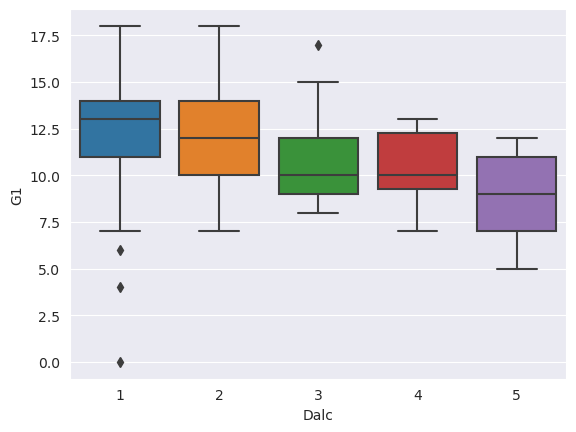

In [145]:
sns.boxplot(data = a, x = 'Dalc', y ='G1')

<Axes: xlabel='Dalc', ylabel='G2'>

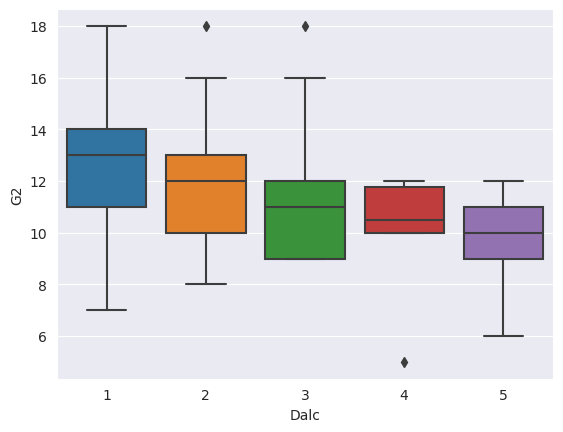

In [146]:
sns.boxplot(data = a, x = 'Dalc', y ='G2')

По диаграммам выше можно сделать следующие выводы:
1) уменьешние выбросов данных над точкой "1" во втором семестре,но сохранение средних значений и сохранение распределение квартилей.
2) увеличение минимального значения данных над точкой "2" во втором семестре. Но уменьшение максимального значения во втором семестре. Так-же видем изменение межкартильного размаха в сторону уменьшения нижней оценки.
3) во втором семестре видим изменения положения медианны в сторону увеличения. Увеличения максимальной оценки.
4) во втором семестре видим смещение положения медианы в сторону ее увеличения, но уменьешние общего распределения данных над точко "4".
5) во втором семестре над точкой "5" видим уменьшение межквартильного размаха. Минимальным значением  стало 6 вместо 5. Медианной переместилась на число 10.

<Axes: xlabel='Walc', ylabel='G1'>

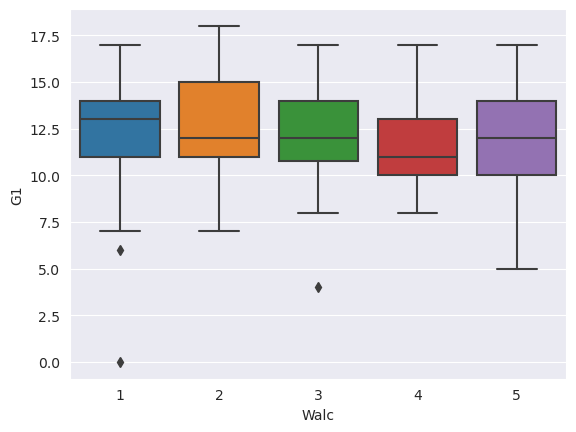

In [147]:
sns.boxplot(data = a, x = 'Walc', y ='G1')

<Axes: xlabel='Walc', ylabel='G2'>

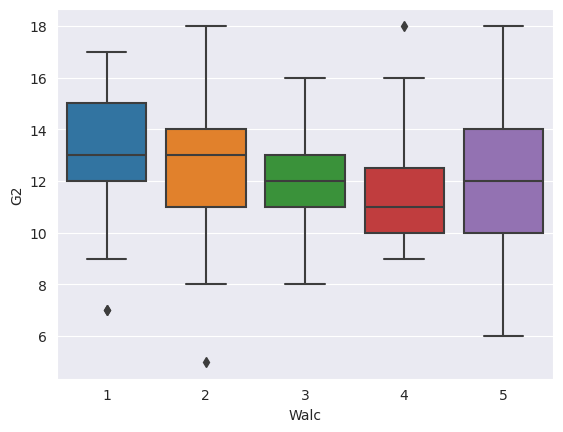

In [148]:
sns.boxplot(data = a, x = 'Walc', y ='G2')

На диаграммах изображенных выше можно увидеть следующие изменения:
1) у школьников минимально употребляющих алкоголь по выходным во втором семестре улучшелись показатели как медианного значения,так и верхнего с нижним квартилей
2) школьники употребление алкоголя которых было на отметке "2" во втором семестре показатели ухудшили, это хорошо отражает межквартильный размах, он сместился в меньшую  сторону. Показатели максимальных значений остались неизменны, но минимальный средний бал увеличился до 8.
3) школьники чье употребление алкоголя в выхохдной день было на отметке "3" по средним показателям остались неизменны,но значение верхниго квартиля снизелось до средней оценки с 14 до 13,максимальное значение тоже упало с 17 до 16
4) школьники чье употребление алкоголя в выхохдной день было на отметке "4" средние опказатели остались на том же уровне,но уменьшилось максимсальное значение с 17,3 до 16 и увеличилось минимальное значение с 8 до 9 во втором семестре.
5) показатели школьников чье употребление алкоголя было максимальным во втором семестре их максимальные показатели выросли до 18 с 17,3 и минимальный показатель изменился с 5 до 6. Но показатели медианы и межквартильного размаха остались неизменными.

<Axes: xlabel='Dalc', ylabel='G1'>

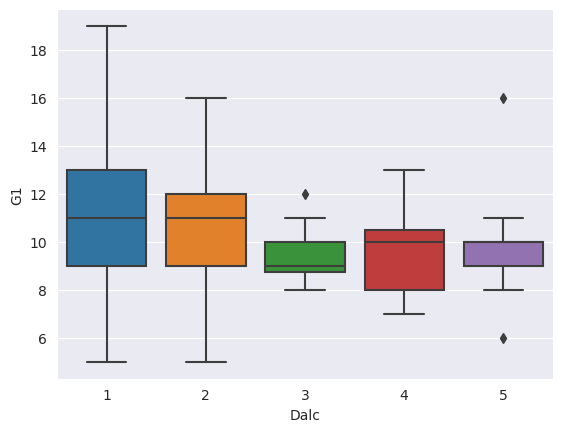

In [149]:
sns.boxplot(data = b, x = 'Dalc', y ='G1') # Посмотрим зависимость среднего балла оценок за первый семестр от кол-ва употребления алкоголя в будние дни у школьников,чьи родители имеют образование ниже среднего.

<Axes: xlabel='Dalc', ylabel='G2'>

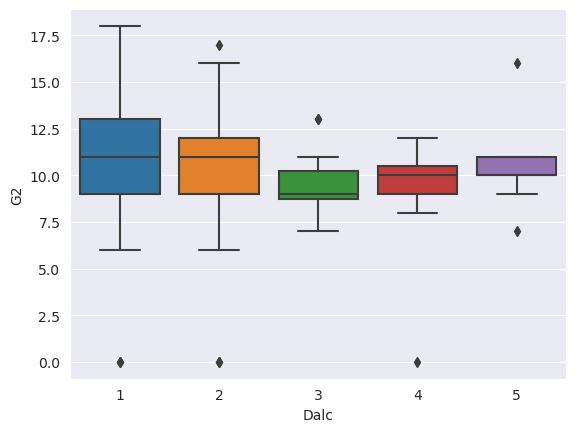

In [150]:
sns.boxplot(data = b, x = 'Dalc', y ='G2')   # Посмотрим зависимость среднего балла оценок за второй семестр от кол-ва употребления алкоголя в будние дни у школьников,чьи родители имеют образование ниже среднего.

На диаграммах расположенных выше можно наблюдать следующее:
1) у школьников с минимальным показателм употребления алкоголя в первом семестре выше макисмальный бал,но ниже минимальный бал. Показатели медианы и межквартильного размаха ухудшились во втором семестре но не значительно.
2) у школьников чье употребление алкоголя ровнялось значению "2" во втором семестре появились выбросы у минимального значения оно ровняется 0 и максимальное значение в районе 17. Показатели медианы и межквартильного размаха практически не изменились.
3) у школьников чье употребление алкоголя ровняется "3" во втором семестре выросло значение верхниго квартиля, появился выброс в районе значения 13. Но минимальное значение стало в районе 7
4) школьники употребляющие алкоголь на отметке "4" во втором семестре показали более низкий максимальный бал 12,а было 13. Разброс средней оценки по данным во втором семестре уменьшился. Но во втором семестре появился выброс в нижней части графика.
5) у школьников употребляющие максимальное кол-во алкоголя во втором семестре увеличились значения верхнего квартиля с 10 до 11, нижнего с 9 до 10

<Axes: xlabel='Walc', ylabel='G1'>

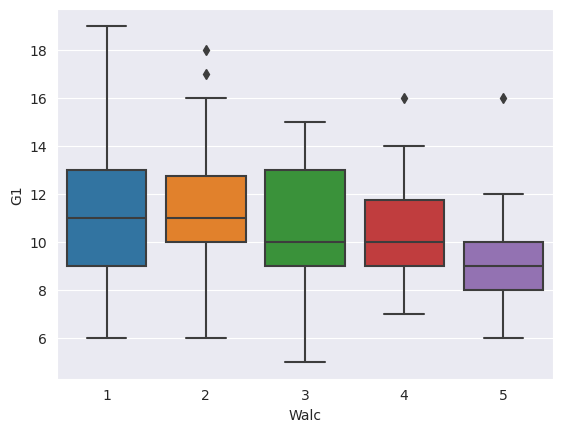

In [151]:
sns.boxplot(data = b, x = 'Walc', y ='G1') # Посмотрим зависимость среднего балла оценок за первый семестр от кол-ва употребления алкоголя в выходные дни у школьников,чьи родители имеют образование ниже среднего.

<Axes: xlabel='Walc', ylabel='G2'>

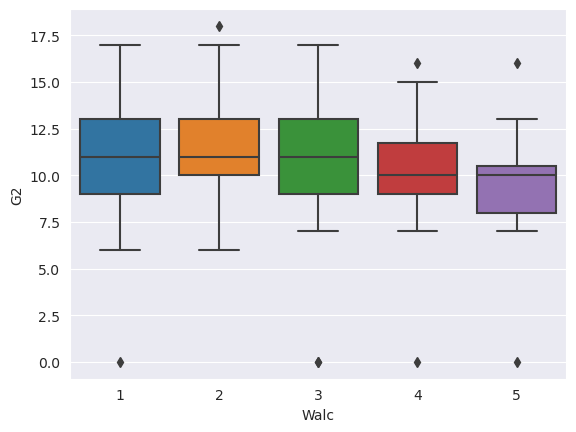

In [152]:
sns.boxplot(data = b, x = 'Walc', y ='G2') # Посмотрим зависимость среднего балла оценок за второй семестр от кол-ва употребления алкоголя в выходные дни у школьников,чьи родители имеют образование ниже среднего.

На диаграммах расположенных выше можно наблюдать следующее:
1) у школьников минимально употребляющих алкоголь по выходным дням во втором семестре межквартильный размах и значение медианны осталось практически без изменений, но уменьшилось ипемтипльное значени с 19 до 17. Во втором семестре появился выброс с минимальным значением 0
2) средний бал школьников употребляющих алкоголь на уровне "2" во втором семестре пропал выброс в районе значения 17. Общие показатели межквартильного размаха и медианы остались практически без изменений.
3) школьники употребляющие алкоголь на уровне "3" во втором семестре показали более высокое медианное значение было 10 стало 11. Максимальное значение во втором семестре так-же изменилось с 15 до 17, минимальное значение выросло со значения 5 в первом семестре до 7 во втором. Но во втором семестре появился выброс в значении 0.
4) школьники чье употребление алкоголя ровняется "4" единицам во втором семестре показали более высокий результат максимального значения, в первом семестре 14 стало 15. Во втором семестре появился выброс в значении 0.
5) школьники выпивающие максимальное кол-во алкоголя по выходным дня во втором семестре показали более высоки средние бали. Медианное значение выросло с 9 баллов до 10, верхний квартиль с 10 до 10,5 во втором семестре. Нижний квартиль остался на том же уровне,но выросло минимальное значение с 6 до 7. Так - же во втором семестре появился выброс в значении 0.

После анализа диаграм видно, что средний бал у школьников чьи родители имеют образование не ниже среднего, выше чем в других семьях.
Относительно вреды алкоголя нельзя сделать однозначенный вывод, потому что данные разнятся и отследить однозначенный тренд ухудшения средней оценки после его употребления нету.

После небольшого анализа данных и их зависимостей разделим данные на train и test. Напишем линейную модель и будем предсказывать значение средней оценки во второй четверти.

In [153]:
y = df_numbers['G2'] # Целевая переменная  (вектор ответов)

X = df_numbers.drop('G2', axis=1) # матрица объекти признак
X.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,18,4,4,2,2,4,3,4,1,1,3,4,0
1,17,1,1,1,2,5,3,3,1,1,3,2,9
2,15,1,1,1,2,4,3,2,2,3,3,6,12
3,15,4,2,1,3,3,2,2,1,1,5,0,14
4,16,3,3,1,2,4,3,2,1,2,5,0,11


In [155]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [190]:
lr = LinearRegression()
lr.fit(Xtrain, ytrain)

pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

print(f"Среднеквадратичная ошибка на тренировочных данных без учета категориальных признаков: {mean_squared_error(pred_train,ytrain)}", "\n" f"cреднеквадратичная ошибка на тестовых данных без учета категориальных признаков: {mean_squared_error(pred_test,ytest)}")

Среднеквадратичная ошибка на тренировочных данных без учета категориальных признаков: 2.266536270312716 
cреднеквадратичная ошибка на тестовых данных без учета категориальных признаков: 1.6329911937590285


Самая простая линейная модель как на тренировочных данных, так и на тестовых в среднем ошибается на 2 балла. Попробуем сделать то же самое но на кросс-валидации

In [191]:
print(-cross_val_score(lr,X, y, cv=3, scoring='neg_mean_squared_error').mean())

2.3350642027900324


С кросс-валидацией предсказания ухудшились на 0,2 балла.

Закодируем категориальные признаки и посмотрим как изменились результаты среднекадваритеческой ошибки.

In [34]:
from  category_encoders.one_hot import OneHotEncoder

In [158]:
y_categorical = df['G2'] # Целевая переменная  (вектор ответов)

X_categorical = df.drop('G2', axis=1) # матрица объекти признак
X_categorical.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,9
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,11


In [161]:
one_hot_enc = OneHotEncoder()

encoder_df = pd.DataFrame(one_hot_enc.fit_transform(X_categorical))

In [162]:
encoder_df

,school_1,school_2,sex_1,sex_2,age,address_1,address_2,famsize_1,famsize_2,Pstatus_1,...,romantic_1,romantic_2,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,1,0,1,0,18,1,0,1,0,1,...,1,0,4,3,4,1,1,3,4,0
1,1,0,1,0,17,1,0,1,0,0,...,1,0,5,3,3,1,1,3,2,9
2,1,0,1,0,15,1,0,0,1,0,...,1,0,4,3,2,2,3,3,6,12
3,1,0,1,0,15,1,0,1,0,0,...,0,1,3,2,2,1,1,5,0,14
4,1,0,1,0,16,1,0,1,0,0,...,1,0,4,3,2,1,2,5,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,19,0,1,1,0,0,...,1,0,5,4,2,1,2,5,4,10
645,0,1,1,0,18,1,0,0,1,0,...,1,0,4,3,4,1,1,1,4,15
646,0,1,1,0,18,1,0,1,0,0,...,1,0,1,1,1,1,1,5,6,11
647,0,1,0,1,17,1,0,0,1,0,...,1,0,2,4,5,3,4,2,6,10


In [163]:
Xtrain_cat, Xtest_cat, ytrain_cat, ytest_cat = train_test_split(encoder_df,y_categorical, test_size=0.3) 

In [187]:
lr_cat = LinearRegression()
lr_cat.fit(Xtrain_cat, ytrain_cat)

pred_train_cat = lr_cat.predict(Xtrain_cat)
pred_test_cat = lr_cat.predict(Xtest_cat)

print(f"Среднеквадратичная ошибка на тренировочных данных после кодирования категориальных признаков: {mean_squared_error(pred_train_cat,ytrain_cat)}", '\n' f"среднеквадратичная ошибка на тестовых данных после кодирования категориальных признаков: {mean_squared_error(pred_test_cat,ytest_cat)}")

Среднеквадратичная ошибка на тренировочных данных после кодирования категориальных признаков: 2.1795678353610217 
среднеквадратичная ошибка на тестовых данных после кодирования категориальных признаков: 1.7558150506309897


После кодирования категориальных признаков ошибка на тестовых данных увеличилась. Это связано с увеличением размерности n-мерного пространства признаков. 
Исходя из полученных результатов первая модель с вещественнвыми признаками является самой оптимальной моделью.